In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
import random
import matplotlib.pylab as plt
from glob import glob
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

SETS_PATH = '../covid_dataset/'
LABELS = ['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID']

2021-10-13 13:15:54.323803: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

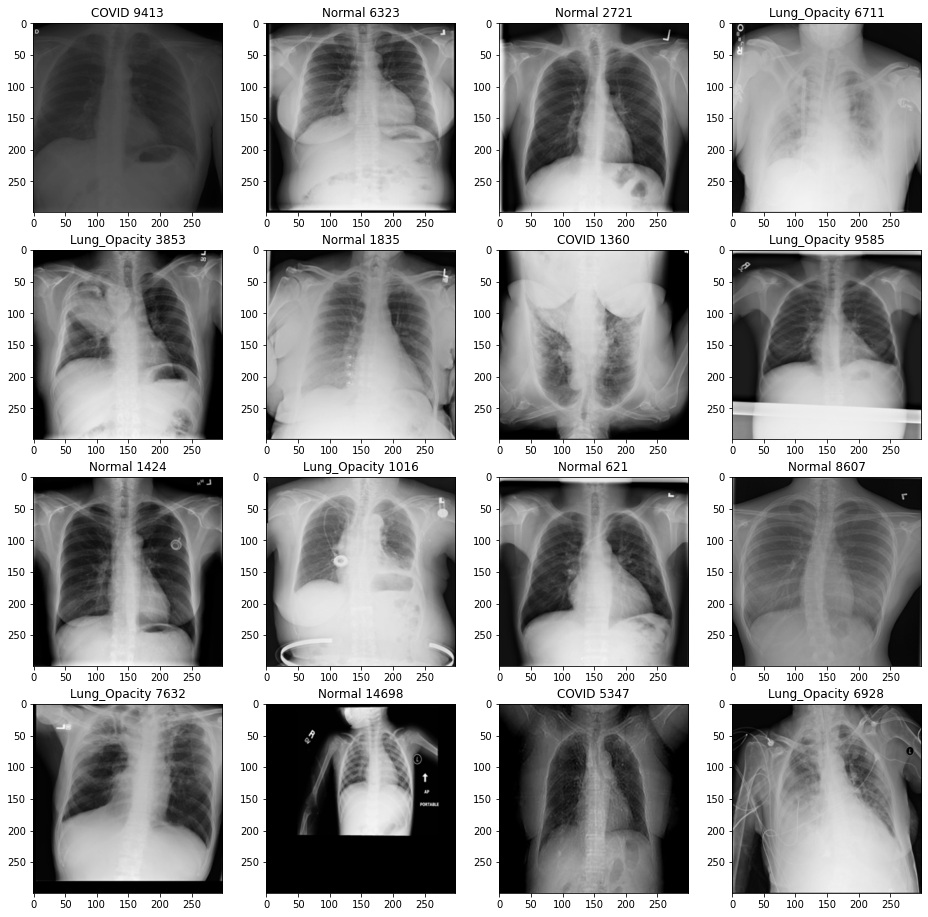

In [4]:
images_in_row = 4
random_indexes = random.choices(range(len(y_train)), k=images_in_row*images_in_row)
      
plt.figure(figsize=(16,16))
for j, index in enumerate(random_indexes):
    plt.subplot(images_in_row, images_in_row, j+1)
    plt.imshow(X_train[index], cmap='gray', vmax=1, vmin=0)
    plt.title(f'{LABELS[np.where(y_train[index]==1)[0][0]]} {index}')

In [4]:
my_model = Sequential()
my_model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=[299,299, 1]))

my_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.25))

my_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.25))

my_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.25))

my_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.25))

my_model.add(Flatten())
my_model.add(Dropout(0.25))

my_model.add(Dense(512, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(128, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(4, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
my_model.summary()

2021-10-13 11:50:16.670409: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 295, 295, 32)      832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 293, 293, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 146, 146, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 146, 146, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 72, 64)        0

2021-10-13 11:50:16.671315: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-13 11:50:16.701488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-13 11:50:16.701794: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-10-13 11:50:16.701826: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-10-13 11:50:16.703225: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-10-13 11:50:16.703274: I tensorflow/stream_executor/plat

In [5]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='checkpoints/6/epoch{epoch}.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
csv_logger = keras.callbacks.CSVLogger('history/history6.csv')

history = my_model.fit(X_train, y_train,
                     epochs=50, batch_size=16, callbacks=[callback,model_checkpoint_callback,csv_logger],
                     verbose=1, validation_data=(X_test, y_test))

2021-10-13 11:50:21.535867: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 5297903260 exceeds 10% of free system memory.
2021-10-13 11:50:23.859816: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-13 11:50:23.878144: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2799925000 Hz


Epoch 1/50


2021-10-13 11:50:24.461695: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-10-13 11:50:24.580859: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-10-13 11:50:25.217349: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-10-13 11:50:25.313035: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


926/926 [==============================] - ETA: 0s - loss: 1.1488 - accuracy: 0.4978

2021-10-13 11:53:43.224861: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2270785400 exceeds 10% of free system memory.


926/926 [==============================] - 228s 227ms/step - loss: 1.1486 - accuracy: 0.4979 - val_loss: 0.8678 - val_accuracy: 0.6540
Epoch 2/50
926/926 [==============================] - 184s 199ms/step - loss: 0.7996 - accuracy: 0.6701 - val_loss: 0.6420 - val_accuracy: 0.7433
Epoch 3/50
926/926 [==============================] - 184s 199ms/step - loss: 0.6668 - accuracy: 0.7343 - val_loss: 0.5824 - val_accuracy: 0.7706
Epoch 4/50
926/926 [==============================] - 184s 199ms/step - loss: 0.5876 - accuracy: 0.7712 - val_loss: 0.4890 - val_accuracy: 0.8211
Epoch 5/50
926/926 [==============================] - 184s 198ms/step - loss: 0.5130 - accuracy: 0.8083 - val_loss: 0.5403 - val_accuracy: 0.7806
Epoch 6/50
926/926 [==============================] - 184s 198ms/step - loss: 0.5014 - accuracy: 0.8096 - val_loss: 0.5121 - val_accuracy: 0.8090
Epoch 7/50
926/926 [==============================] - 184s 198ms/step - loss: 0.4752 - accuracy: 0.8257 - val_loss: 0.4607 - val_accura

In [ ]:
my_model = keras.models.load_model('checkpoints/6_1/epoch5.h5')
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='checkpoints/6_2/epoch{epoch}.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
csv_logger = keras.callbacks.CSVLogger('history/history6_2.csv')

history = my_model.fit(X_train, y_train,
                     epochs=50, batch_size=16, callbacks=[callback,model_checkpoint_callback,csv_logger],
                     verbose=1, validation_data=(X_test, y_test))

2021-10-13 13:16:08.489867: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-13 13:16:08.494400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-13 13:16:08.537638: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-13 13:16:08.538029: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-10-13 13:16:08.538100: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-10-13 13:16:08.558704: I tensorflow/stream_executor/platform/def

Epoch 1/50


2021-10-13 13:16:12.828457: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-10-13 13:16:13.083641: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-10-13 13:16:14.077483: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-10-13 13:16:14.168510: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


926/926 [==============================] - ETA: 0s - loss: 0.3231 - accuracy: 0.8831

2021-10-13 13:19:30.516282: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2270785400 exceeds 10% of free system memory.


926/926 [==============================] - 227s 227ms/step - loss: 0.3231 - accuracy: 0.8831 - val_loss: 0.3775 - val_accuracy: 0.8627
Epoch 2/50
926/926 [==============================] - 187s 202ms/step - loss: 0.3081 - accuracy: 0.8897 - val_loss: 0.4127 - val_accuracy: 0.8460
Epoch 3/50
926/926 [==============================] - 187s 202ms/step - loss: 0.2859 - accuracy: 0.8950 - val_loss: 0.3644 - val_accuracy: 0.8693
Epoch 4/50
926/926 [==============================] - 188s 203ms/step - loss: 0.2914 - accuracy: 0.8954 - val_loss: 0.3730 - val_accuracy: 0.8628
Epoch 5/50
926/926 [==============================] - 187s 202ms/step - loss: 0.2986 - accuracy: 0.8917 - val_loss: 0.4051 - val_accuracy: 0.8542
Epoch 6/50
926/926 [==============================] - 187s 202ms/step - loss: 0.2882 - accuracy: 0.8959 - val_loss: 0.3890 - val_accuracy: 0.8602
Epoch 7/50
926/926 [==============================] - ETA: 0s - loss: 0.2988 - accuracy: 0.8925

In [6]:
my_model.save('checkpoints/5/epoch1_8.h5')